In [82]:
import datetime as dt
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import mplfinance as mpf


In [2]:
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")


In [116]:
# Set the date range from the current date and the previous  3 years.
start_date = dt.datetime.now() - dt.timedelta(days=365 * 3)
end_date = dt.datetime.now()

#Define a stock  symbol for use
ticker = 'MSFT'


In [118]:
# Download the data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


### Simple Moving Average

In [119]:
#Create a copy of the main Dataframe
data2 = data.copy()
#Calculate the 100-period Simple Moving Average (SMA) of the 'Close' column and store it in (SMA_100) column
data2['SMA_100'] = ta.sma(data['Close'], 100)


In [120]:
data2

,Open,High,Low,Close,Adj Close,Volume,SMA_100
Date,,,,,,,
2021-05-17,246.550003,246.589996,243.520004,245.179993,238.875839,24970200,NaN
2021-05-18,246.270004,246.410004,242.899994,243.080002,236.829834,20168000,NaN
2021-05-19,239.309998,243.229996,238.600006,243.119995,237.415756,25739800,NaN
2021-05-20,243.960007,247.949997,243.860001,246.479996,240.696930,21800700,NaN
2021-05-21,247.570007,248.330002,244.740005,245.169998,239.417648,21863100,NaN
...,...,...,...,...,...,...,...
2024-05-07,414.660004,414.670013,409.089996,409.339996,409.339996,20018200,402.8397
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300,403.2014
2024-05-09,410.570007,412.720001,409.100006,412.320007,412.320007,14689700,403.6653


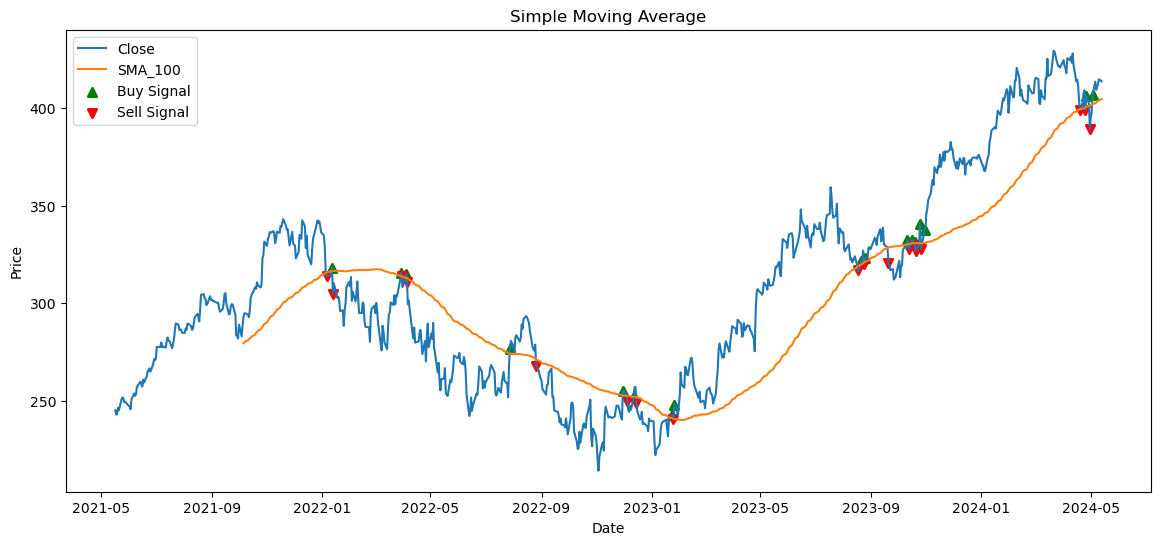

In [121]:

# Plot the 'Close' and the SMA_100
plt.figure(figsize=(14, 6))
plt.plot(data2['Close'], label='Close')
plt.plot(data2['SMA_100'], label='SMA_100')

#Add  Buy signal => When the 'Close' price crosses above the 'SMA_100'
buy_signal = data2[(data2['Close'] > data2['SMA_100']) & (data2['Close'].shift(1) <= data2['SMA_100'].shift(1))]
plt.scatter(buy_signal.index, buy_signal['Close'], marker='^', color='g', label='Buy Signal', lw=2)

#Add Sell signal => When the 'Close' price crosses below the 'SMA_100'
sell_signal = data2[(data2['Close'] < data2['SMA_100']) & (data2['Close'].shift(1) >= data2['SMA_100'].shift(1))]
plt.scatter(sell_signal.index, sell_signal['Close'], marker='v', color='r', label='Sell Signal', lw=2)

plt.legend()
plt.title("Simple Moving Average")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


### Note

When the closing price crosses above the SMA_100, it suggests a potential upward trend hence we  could  interprete it as a buy signal whereas when it croosses  bellow the SMA_100 its a Sell Signal.

### Exponential Moving Average

In [18]:
#Calculate the 100-period exponential Moving Average (EMA) of the 'Close' column and store it in (EMA_100) column
data2['EMA_100'] = ta.ema(data['Close'], 100)


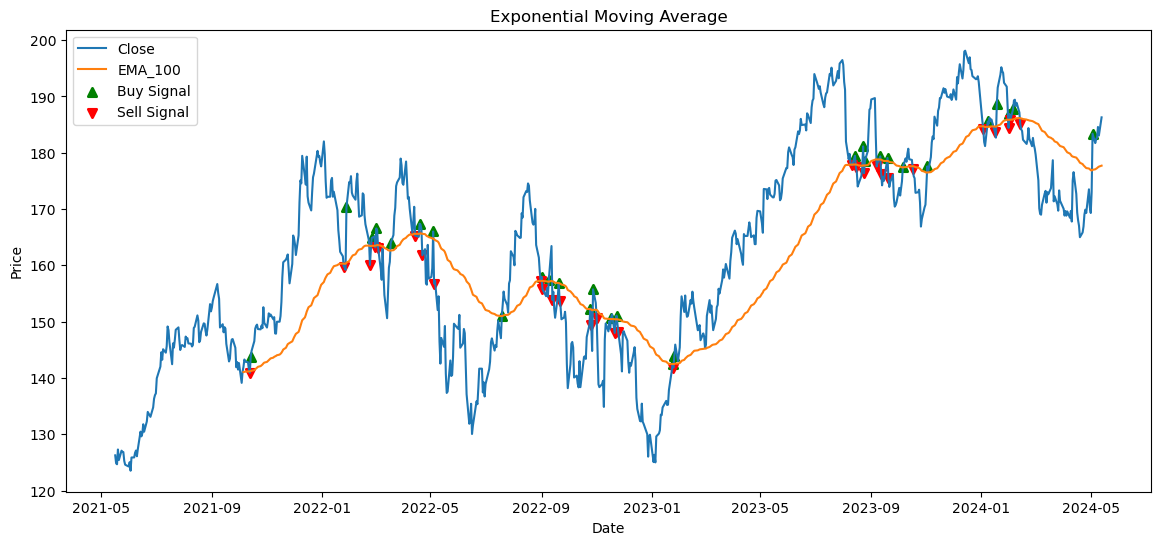

In [19]:

# Plot the 'Close' and the EMA_100
plt.figure(figsize=(14, 6))
plt.plot(data2['Close'], label='Close')
plt.plot(data2['EMA_100'], label='EMA_100')

#Add Buy signal => When the 'Close' price crosses above the 'EMA_100'
buy_signal = data2[(data2['Close'] > data2['EMA_100']) & (data2['Close'].shift(1) <= data2['EMA_100'].shift(1))]
plt.scatter(buy_signal.index, buy_signal['Close'], marker='^', color='g', label='Buy Signal', lw=2)

# Sell signal: When the 'Close' price crosses below the 'EMA_100'
sell_signal = data2[(data2['Close'] < data2['EMA_100']) & (data2['Close'].shift(1) >= data2['EMA_100'].shift(1))]
plt.scatter(sell_signal.index, sell_signal['Close'], marker='v', color='r', label='Sell Signal',lw=2)

plt.legend()
plt.title("Exponential Moving Average")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


### Note

When the closing price crosses above the 100-period exponential Moving Average (EMA_100), it indicates a potential upward trend, which could be interpreted as a buy signal whereas when the closing price crosses below the EMA_100, it suggests a potential downward trend, which could be interpreted as a sell signal

### Relative Strength Index

In [20]:
#Calculate the  Relative Strength Index (RSI)  of the 'Close' column and store it in RSI column
data2['RSI'] = ta.rsi(data['Close'])


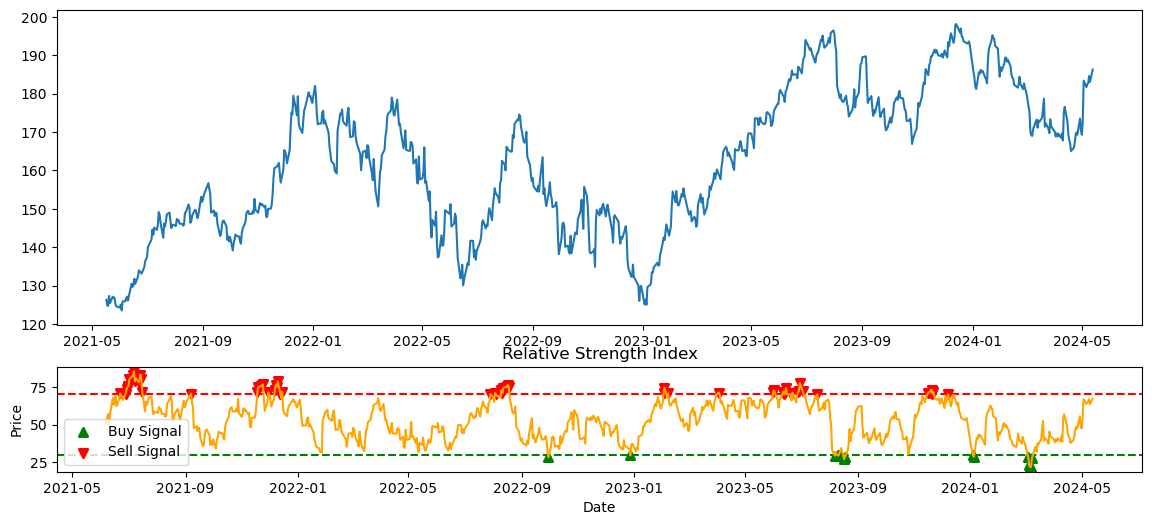

In [28]:

# Creating subplots with 2 rows and 1 column, where the first subplot has 3 times the height of the second subplot
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(14, 6))

# Plotting the 'Close' column on the first subplot
axs[0].plot(data2['Close'])

# Adding horizontal lines at y=70 (red dashed line) and y=30 (green dashed line) on the second subplot
axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')

# Plotting the 'RSI' column on the second subplot with the color orange
axs[1].plot(data2['RSI'], color='orange')

# Add buy signals when RSI crosses above 30
buy_signals = data2[data2['RSI'] < 30]
# axs[0].scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', lw=2)
axs[1].scatter(buy_signals.index, buy_signals['RSI'], marker='^', color='g', label='Buy Signal',lw=2)

# Add sell signals when RSI crosses below 70
sell_signals = data2[data2['RSI'] > 70]
# axs[0].scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', lw=2)
axs[1].scatter(sell_signals.index, sell_signals['RSI'], marker='v', color='r', label='Sell Signal', lw=2)

# Show legend
axs[1].legend()
plt.title("Relative Strength Index")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


### Note

When the Relative Strength Index (RSI) crosses above the overbought threshold which is 70, it suggests that the asset may have been overvalued and could potentially experience a price reversal which indicats a sell signal. Also when the RSI crosses below the oversold threshold which is 30, it suggests that the asset may have been undervalued and could potentially experience a price rebound hence indicating a buy signal.

### Identifying Engulfing patterns

In [98]:
 # Define logic to identify engulfing patterns
def identify_engulfing(open_prices, high_prices, low_prices, close_prices):
   
    engulfing = []  # List to store engulfing pattern signals
    
    for i in range(1, len(close_prices)):
        # Check if the current candle is bullish
        if close_prices[i] > open_prices[i]:
            # Check if the previous candle is bearish and the current high is higher than the previous high
            if close_prices[i-1] < open_prices[i-1] and high_prices[i] > high_prices[i-1]:
                engulfing.append(1)  # Bullish engulfing pattern
            else:
                engulfing.append(0)
        # Check if the current candle is bearish
        elif close_prices[i] < open_prices[i]:
            # Check if the previous candle is bullish and the current low is lower than the previous low
            if close_prices[i-1] > open_prices[i-1] and low_prices[i] < low_prices[i-1]:
                engulfing.append(-1)  # Bearish engulfing pattern
            else:
                engulfing.append(0)
        else:
            engulfing.append(0)  # No engulfing pattern
        
    return [None] + engulfing  # Return a list with a None as the first element to match DataFrame indexing



In [110]:
# Calculate the engulfing pattern
engulfing_signal = identify_engulfing(data2['Open'], data2['High'], data2['Low'], data2['Close'])

# Add the engulfing pattern column to data2 DataFrame
data2['ENGULFFING'] = engulfing_signal
# Calculate the engulfing pattern
engulfing_signal = identify_engulfing(data2['Open'], data2['High'], data2['Low'], data2['Close'])

# Add the engulfing pattern column to data2 DataFrame
data2['ENGULFFING'] = engulfing_signal

# Define buy and sell signals based on engulfing patterns
data2['Buy_Signal'] = (data2['ENGULFFING'] == 1)
data2['Sell_Signal'] = (data2['ENGULFFING'] == -1)

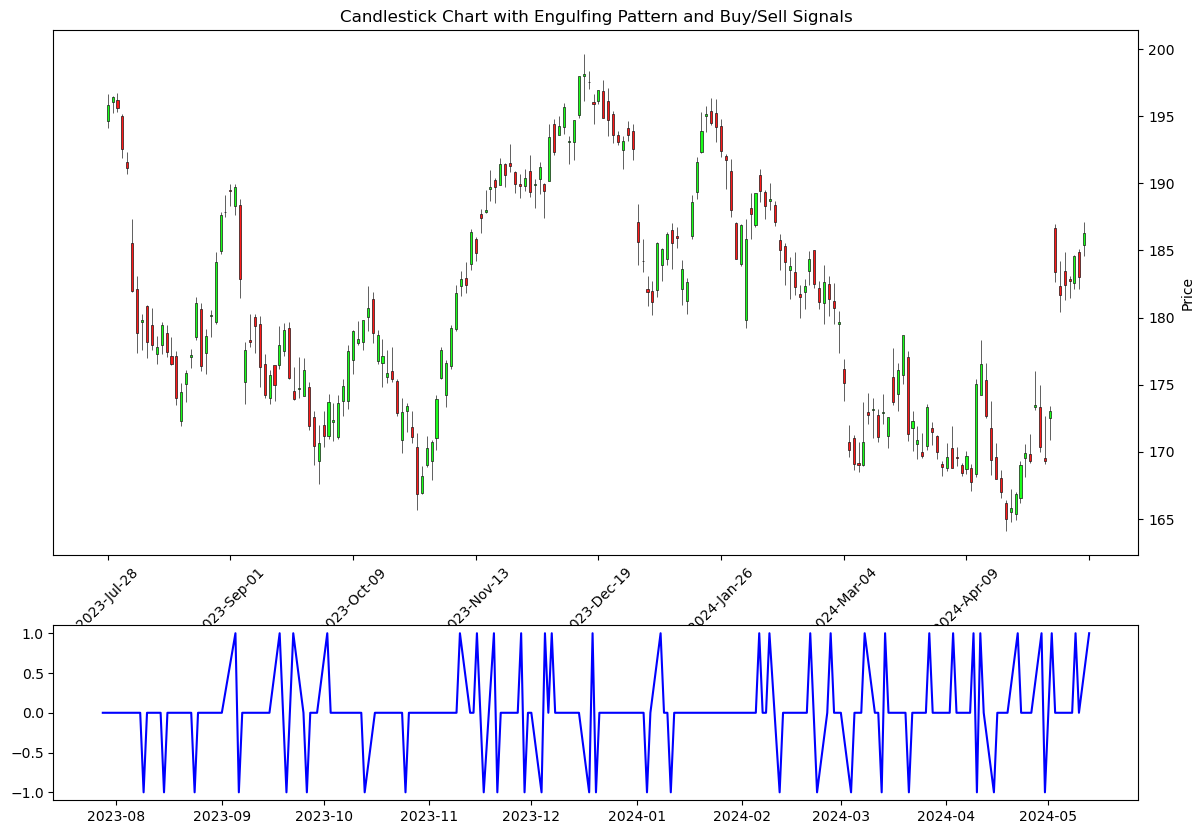

In [115]:
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(14, 10))  

# Define market colors
colors = mpf.make_marketcolors(up='#00ff00', down='#ff0000')

# Define mplfinance style with grid lines
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=colors, gridstyle='--')

# Plot candlestick chart with zooming in on the last 100 data points
mpf.plot(data2[-200:], type='candle', ax=axs[0], style=mpf_style)

# Plot engulfing pattern data 
axs[1].plot(data2['ENGULFFING'][-200:], color='blue')

# Add buying signals (green markers) and selling signals (red markers) to the candlestick chart
# buy_signals = data2[data2['Buy_Signal'] == True][-200:]
# sell_signals = data2[data2['Sell_Signal'] == True][-200:]
# axs[0].scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
# axs[0].scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')

# Set title for the subplot
axs[0].set_title('Candlestick Chart with Engulfing Pattern and Buy/Sell Signals')

# Show legend
# axs[0].legend()

# Show plot
plt.show()


### Note

- When an Engulfing pattern forms, it indicates a potential shift in market sentiment. A bullish Engulfing pattern occurs when a smaller bearish candle is followed by a larger bullish candle, suggesting that buying pressure has overwhelmed selling pressure. This could signal a potential upward reversal in price, making it a buy signal. 
- A bearish Engulfing pattern,  a smaller bullish candle is followed by a larger bearish candle, indicates that selling pressure has overwhelmed buying pressure. This could signal a potential downward reversal in price, making it a sell signal.

### Linear Regression

In [34]:
# Eliminate the first 100 NaN values
data2 = data2.iloc[100:]
data2

,Open,High,Low,Close,Adj Close,Volume,SMA_100
Date,,,,,,,
2021-10-07,143.059998,144.220001,142.720001,143.289993,141.093185,61732700,141.2257
2021-10-08,144.029999,144.179993,142.559998,142.899994,140.709152,58773200,141.4062
2021-10-11,142.270004,144.809998,141.809998,142.809998,140.620560,64452200,141.5874
2021-10-12,143.229996,143.250000,141.039993,141.509995,139.340485,73035900,141.7294
2021-10-13,141.240005,141.399994,139.199997,140.910004,138.749664,78762700,141.8842
...,...,...,...,...,...,...,...
2024-05-07,183.449997,184.899994,181.320007,182.399994,182.152924,77305800,180.5466
2024-05-08,182.850006,183.070007,181.449997,182.740005,182.492477,45057100,180.3944
2024-05-09,182.559998,184.660004,182.110001,184.570007,184.320007,48983000,180.2590


In [36]:
data2.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SMA_100      0
dtype: int64

In [137]:


# Ensure 'Close' column does not contain any missing values
if data2['Close'].isnull().any():
    print("Warning: 'Close' column contains missing values after dropping NaNs.")
else:
    # Calculate the linear regression with a window of 200 periods
    data2['LINEARREG'] = ta.linreg(data2['Close'], 100)


In [129]:
data2

,Open,High,Low,Close,Adj Close,Volume,SMA_100,LINEARREG
Date,,,,,,,,
2021-05-17,246.550003,246.589996,243.520004,245.179993,238.875839,24970200,NaN,NaN
2021-05-18,246.270004,246.410004,242.899994,243.080002,236.829834,20168000,NaN,NaN
2021-05-19,239.309998,243.229996,238.600006,243.119995,237.415756,25739800,NaN,NaN
2021-05-20,243.960007,247.949997,243.860001,246.479996,240.696930,21800700,NaN,NaN
2021-05-21,247.570007,248.330002,244.740005,245.169998,239.417648,21863100,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-07,414.660004,414.670013,409.089996,409.339996,409.339996,20018200,402.8397,429.614521
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300,403.2014,430.130428
2024-05-09,410.570007,412.720001,409.100006,412.320007,412.320007,14689700,403.6653,430.729552


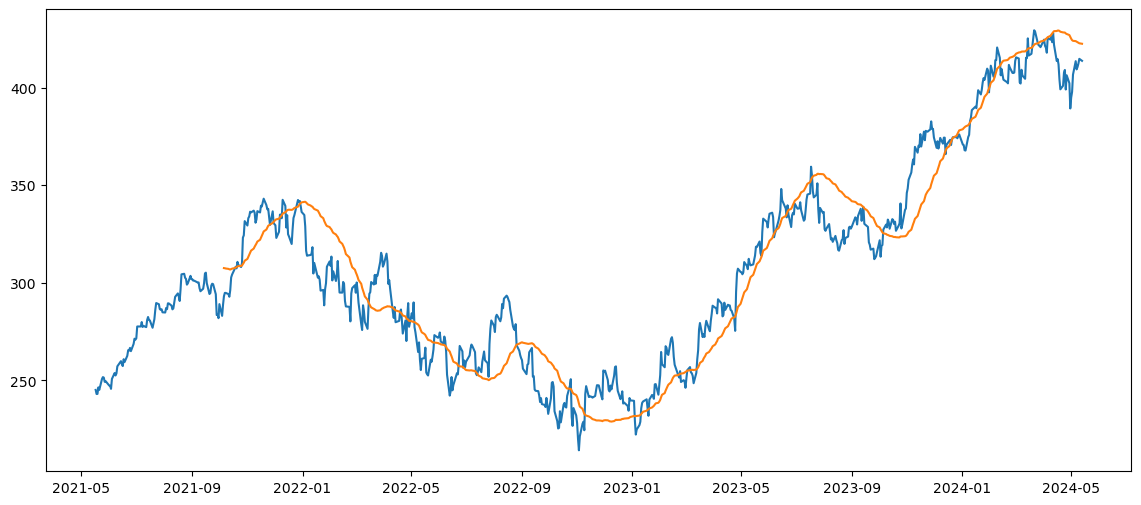

In [138]:
plt.figure(figsize=(14, 6))
plt.plot(data2['Close'])
plt.plot(data2['LINEARREG'])
plt.show()


### MACD indicator

In [145]:

def calculate_macd(data, slow_period=26, fast_period=12, smooth_period=9):
  """
  Args:
      data => A DataFrame with the closing price data ('Close' column).
      slow => The slow period for the EMA (default: 12).
      fast => The fast period for the EMA (default: 26).
      smooth => The smoothing period for the signal line EMA (default: 9).
  """

  # Calculate EMA for slow and fast periods
    # ewm(span=fast, adjust=False) => This applies the Exponential Weighted Moving Average (EWMA) function to the closing price data.
  ema_slow = data.ewm(span=slow_period, adjust=False).mean()
  ema_fast = data.ewm(span=fast_period, adjust=False).mean()

  # Calculate MACD
  macd = ema_fast - ema_slow

  # Calculate signal line (EMA of MACD)
    #ewm(span=smooth_period, adjust=False) => This applies the Exponential Weighted Moving Average (EWMA) function again, but this time to the 
                #macd values.
  signal_line = macd.ewm(span=smooth_period, adjust=False).mean()

  # Calculate histogram (difference between MACD and signal line)
  hist = macd - signal_line

  # Create a DataFrame to store results
  macd_data = pd.DataFrame({'MACD': macd, 'Signal Line': signal_line, 'Histogram': hist})
    #Returns => pd.DataFrame: A DataFrame containing the MACD, signal line, and histogram values.
  return macd_data


In [146]:

# Calculate MACD components
macd_data = calculate_macd(data2['Close'])
macd = macd_data['MACD']
macd_signal = macd_data['Signal Line']
macd_hist = macd_data['Histogram']


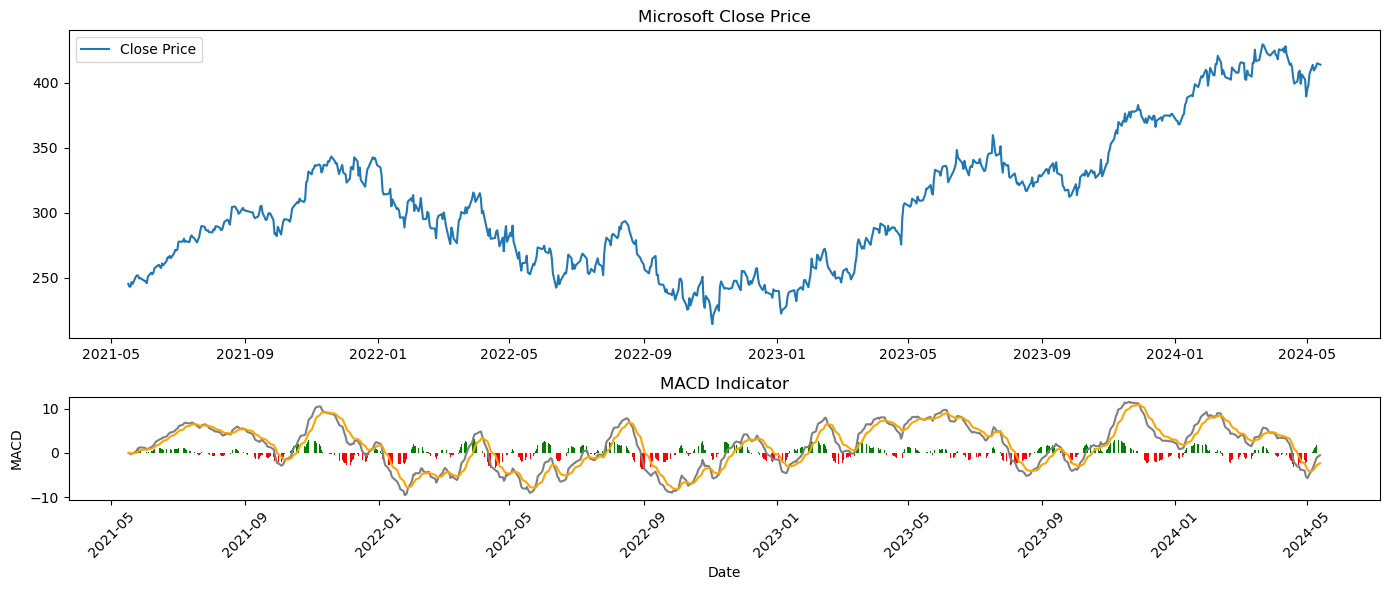

In [149]:


# Create a figure for plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 6), gridspec_kw={'height_ratios': [3, 1]})

# Plot the closing price on the top subplot
axs[0].plot(data2['Close'], label='Close Price')
axs[0].set_title('Microsoft Close Price')
axs[0].legend()

# Plot MACD, signal line, and histogram on the bottom subplot
axs[1].plot(macd, label='MACD', color='gray')
axs[1].plot(macd_signal, label='Signal Line', color='orange')
axs[1].bar(macd_hist.index, macd_hist.values, color=['red' if x < 0 else 'green' for x in macd_hist.values])  # Color bars based on sign

# Set labels and title for the bottom subplot
axs[1].set_xlabel('Date')
axs[1].set_ylabel('MACD')
axs[1].set_title('MACD Indicator')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### Note

- **Buy Signal:** A potential buy signal might be indicated when the MACD line crosses above the signal line.This might be suggesting a shift towards a bullish trend  as the short-term (fast EMA) becomes stronger than the long-term (slow EMA) average.
- **Sell Signal:** A potential sell signal might be present when the MACD line crosses below the signal line. This could then indicate a shift towards a bearish trend  as the short-term average falls below the long-term average